In [1]:
# !pip install seaborn
# !pip install librosa
# !pip install -U scikit-learn
# !pip install tensorflow
# !pip install numpy==1.23.5
# !pip install pandas==1.5

In [73]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [3]:
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)

Ravdess = os.path.join(parent_dir, "data/raw/ravdess_audios/")
Crema = os.path.join(parent_dir, "data/raw/CREMA/AudioWAV/")
Tess = os.path.join(parent_dir, "data/raw/TESS/TESS Toronto emotional speech set data/")
Savee = os.path.join(parent_dir, "data/raw/SAVEE/ALL/")

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir1 in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir1)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir1 + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\lucas\Python\speech-emotion-project\d...
1  neutral  C:\Users\lucas\Python\speech-emotion-project\d...
2  neutral  C:\Users\lucas\Python\speech-emotion-project\d...
3  neutral  C:\Users\lucas\Python\speech-emotion-project\d...
4     calm  C:\Users\lucas\Python\speech-emotion-project\d...

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:\Users\lucas\Python\speech-emotion-project\d...
1  disgust  C:\Users\lucas\Python\speech-emotion-project\d...
2     fear  C:\Users\lucas\Python\speech-emotion-project\d...
3    happy  C:\Users\lucas\Python\speech-emotion-project\d...
4  neutral  C:\Users\lucas\Python\speech-emotion-project\d...

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:\Users\lucas\Python\speech-emotion-project\d...
1    angry  C:\Users\lucas\Python\speech-emotion-project\d...
2    angry  C:\Users\lucas\Python\speech-emotion-project\d...
3    angry  C:\Users\lucas\Python\speech-emotion-project\d...
4    angry  C:\Users\lucas\Python\speech-emotion-project\d...

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:\Users\lucas\Python\speech-emotion-project\d...
1    angry  C:\Users\lucas\Python\speech-emotion-project\d...
2    angry  C:\Users\lucas\Python\speech-emotion-project\d...
3    angry  C:\Users\lucas\Python\speech-emotion-project\d...
4    angry  C:\Users\lucas\Python\speech-emotion-project\d...

In [8]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

Emotions                                               Path
0     neutral  C:\Users\lucas\Python\speech-emotion-project\d...
1     neutral  C:\Users\lucas\Python\speech-emotion-project\d...
2     neutral  C:\Users\lucas\Python\speech-emotion-project\d...
3     neutral  C:\Users\lucas\Python\speech-emotion-project\d...
4        calm  C:\Users\lucas\Python\speech-emotion-project\d...
..        ...                                                ...
475  surprise  C:\Users\lucas\Python\speech-emotion-project\d...
476  surprise  C:\Users\lucas\Python\speech-emotion-project\d...
477  surprise  C:\Users\lucas\Python\speech-emotion-project\d...
478  surprise  C:\Users\lucas\Python\speech-emotion-project\d...
479  surprise  C:\Users\lucas\Python\speech-emotion-project\d...

[12162 rows x 2 columns]

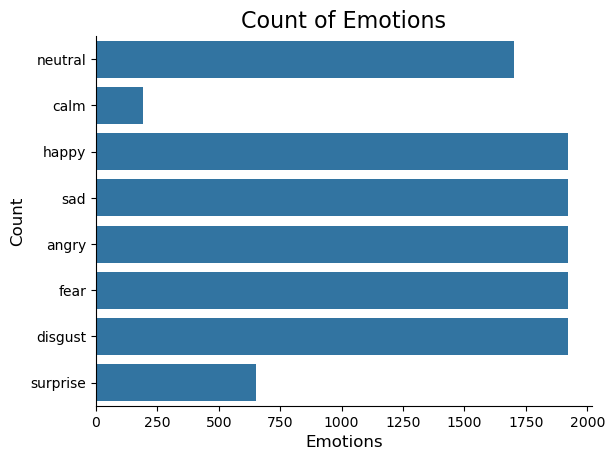

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, color='blue')
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

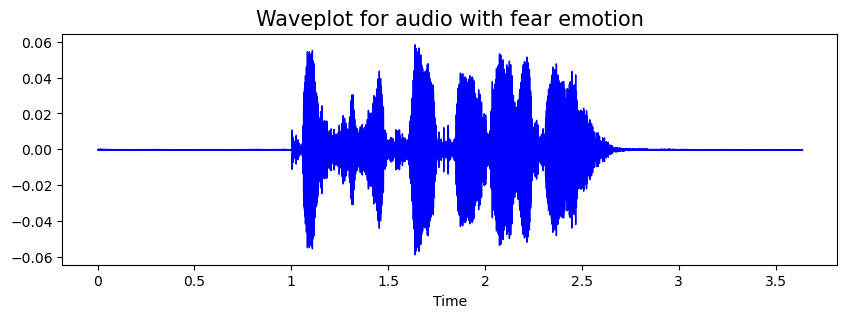

array([-6.0338562e+02,  5.5155254e+01, -6.0278039e+00,  9.1299000e+00,
        4.3948555e+00, -4.0410972e+00, -8.0736818e+00, -1.2255183e+01,
       -1.6346151e+01, -4.0777426e+00, -3.4491823e+00, -6.1606860e+00,
       -2.6365185e-01, -6.3455257e+00, -1.8471318e+00,  2.6649182e+00,
       -7.4117484e+00, -4.2307553e+00, -2.4177980e+00, -3.1686304e+00],
      dtype=float32)

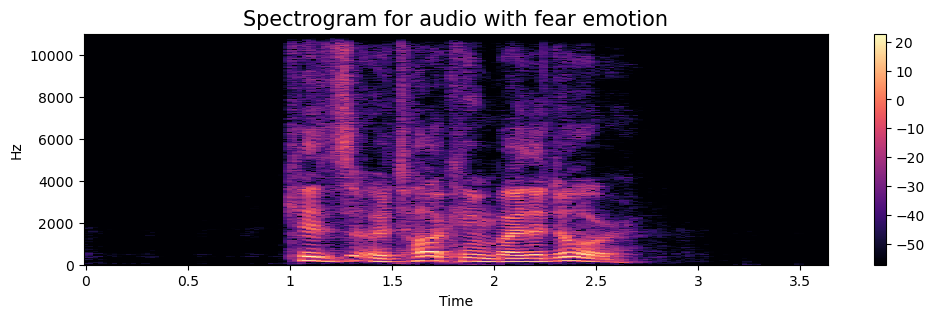

In [46]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

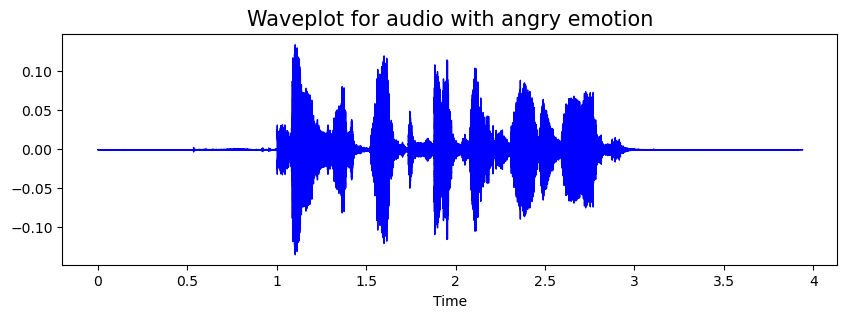

array([-526.2785   ,   40.100624 ,   -5.4062862,    8.0860615,
         -3.3844342,   -3.6563706,   -7.031596 ,   -8.578679 ,
        -13.111328 ,   -6.569745 ,   -4.498286 ,   -6.6619687,
         -3.472775 ,   -4.7383814,   -4.606366 ,   -3.0088396,
         -8.43908  ,   -1.8164217,   -5.5824895,   -4.278462 ],
      dtype=float32)

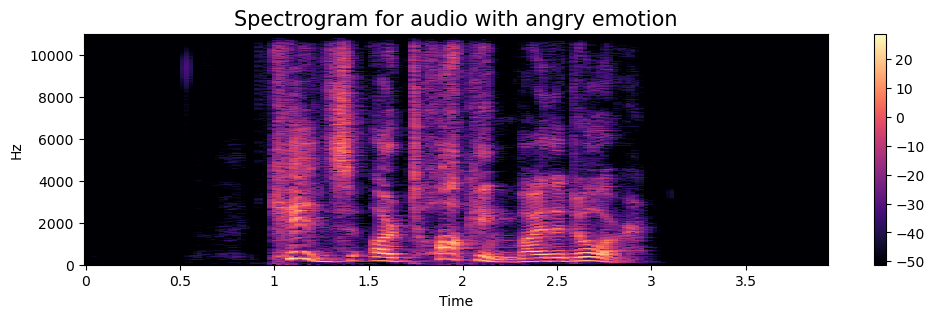

In [53]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

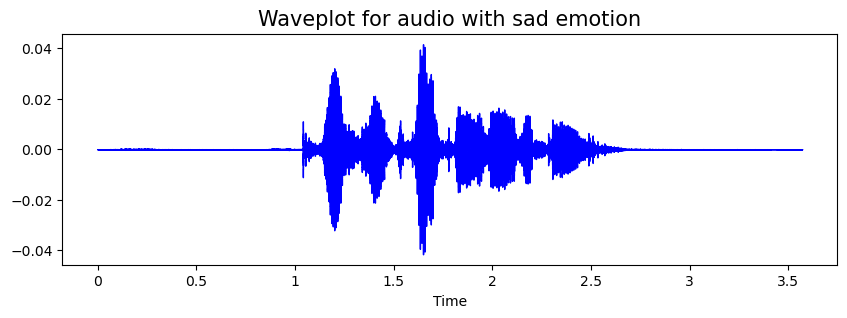

array([-6.9910425e+02,  6.5496918e+01, -1.0995516e+00,  1.6531912e+01,
        8.5230474e+00, -4.6712276e-01,  1.7382099e-01, -7.5890479e+00,
       -1.0304402e+01, -5.5254693e+00, -1.7454493e+00, -2.0158567e+00,
       -1.7528472e+00, -3.4568093e+00, -7.0953143e-01, -8.7063539e-01,
       -3.7369144e+00, -2.6888247e+00, -1.6581136e+00, -5.3825095e-02],
      dtype=float32)

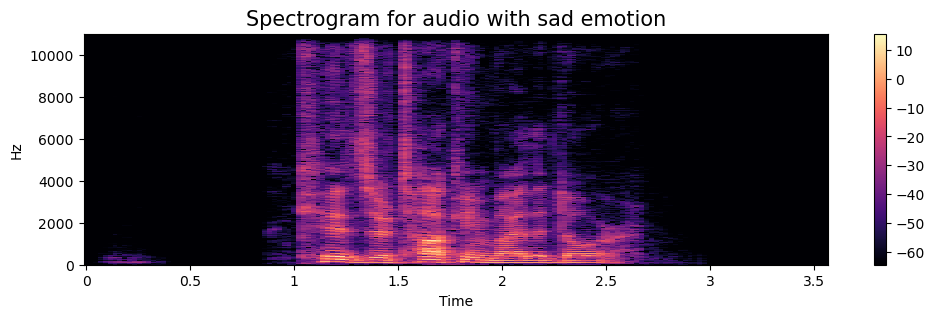

In [45]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

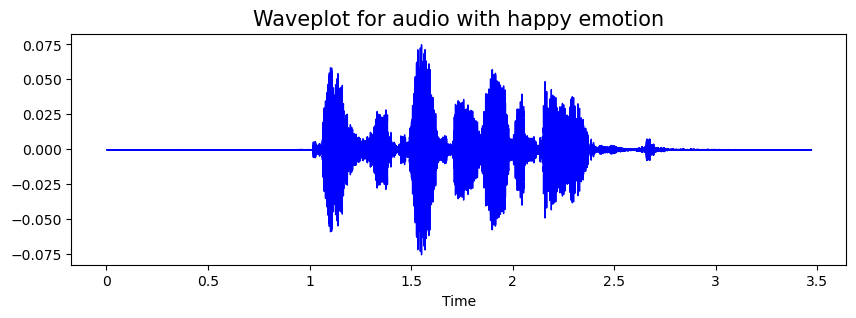

array([0.00490527], dtype=float32)

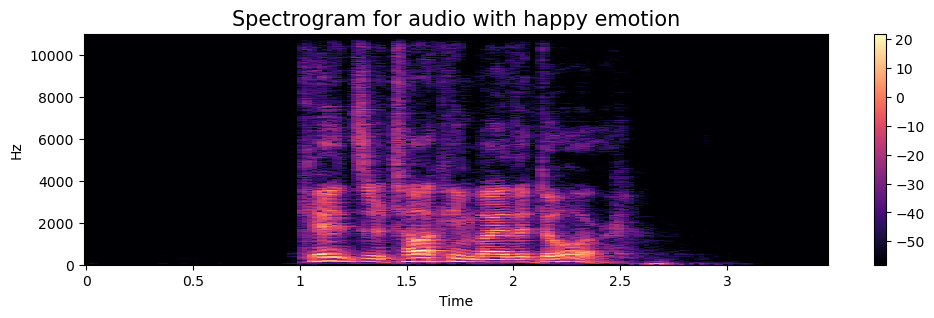

In [57]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
np.mean(librosa.feature.rms(y=data).T, axis=0)

In [19]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate1=0.8):
    return librosa.effects.time_stretch(data, rate = rate1)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

#not using pitch
def pitch(data, sampling_rate, pitch_factor1=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor = pitch_factor1)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)



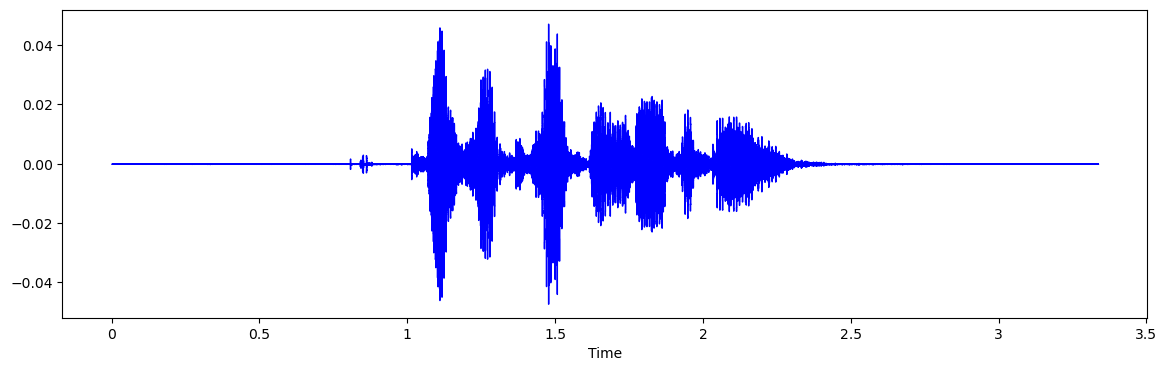

In [21]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate, color='blue')
Audio(path)

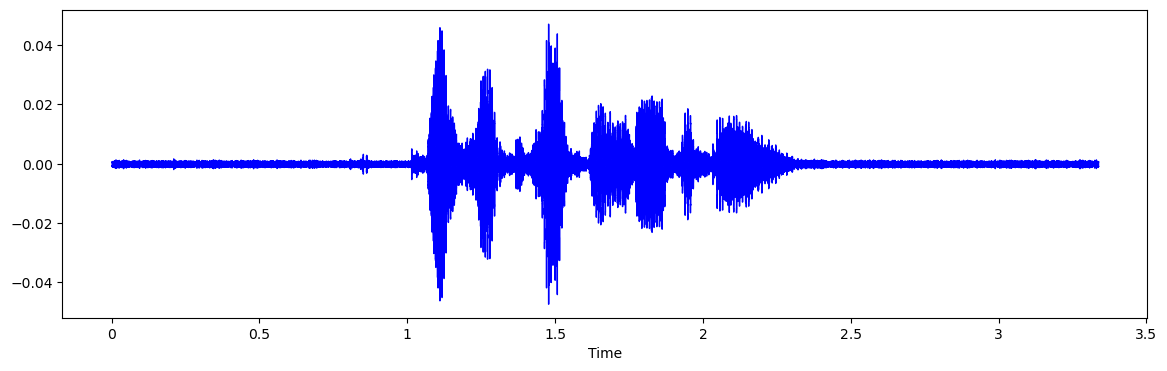

In [22]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color='blue')
Audio(x, rate=sample_rate)

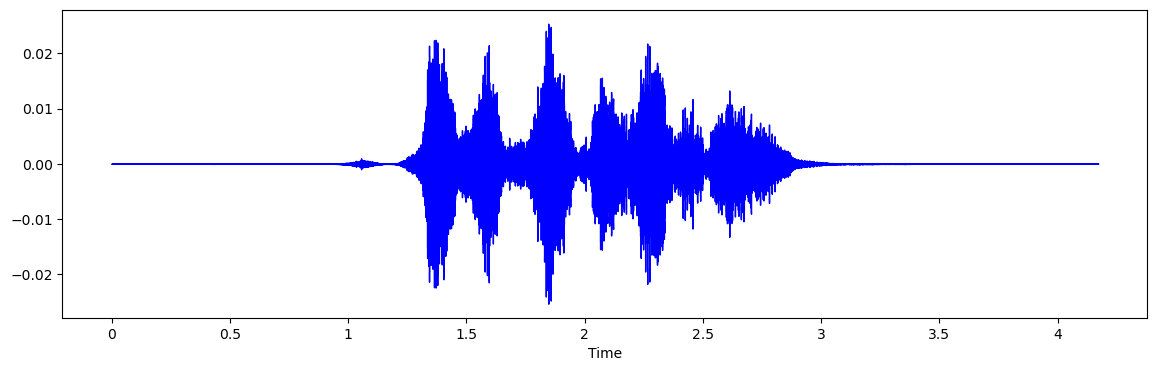

In [24]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color='blue')
Audio(x, rate=sample_rate)

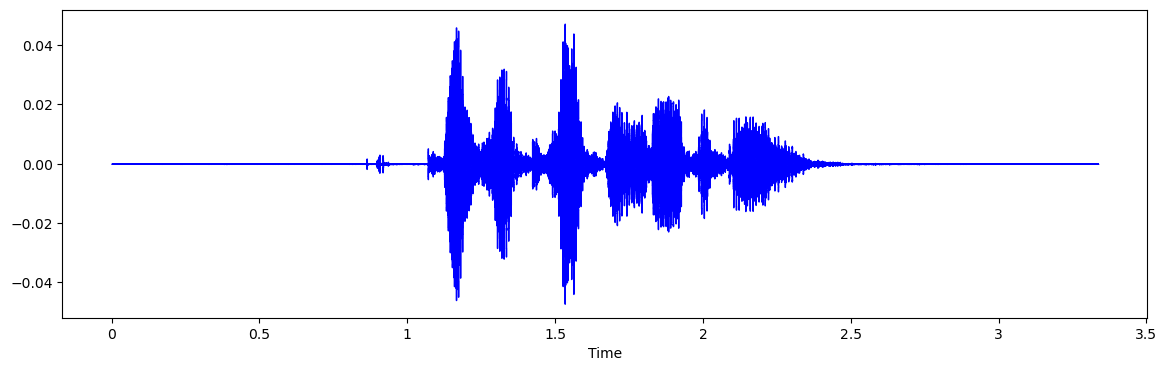

In [25]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color='blue')
Audio(x, rate=sample_rate)

In [28]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    #data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(new_data)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [44]:
np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

array([-526.2785   ,   40.100624 ,   -5.4062862,    8.0860615,
         -3.3844342,   -3.6563706,   -7.031596 ,   -8.578679 ,
        -13.111328 ,   -6.569745 ,   -4.498286 ,   -6.6619687,
         -3.472775 ,   -4.7383814,   -4.606366 ,   -3.0088396,
         -8.43908  ,   -1.8164217,   -5.5824895,   -4.278462 ],
      dtype=float32)

In [29]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.304172  0.735722  0.800011  0.802794  0.793993  0.809679  0.749420   
2  0.173025  0.674528  0.752073  0.725325  0.729231  0.728289  0.665119   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.341426  0.806057  0.845345  0.827944  0.815640  0.805133  0.711177   

          7         8         9  ...       153       154           155  \
0  0.684966  0.733049  0.753972  ...  0.000004  0.000003  2.148075e-06   
1  0.654590  0.697937  0.730179  ...  0.000026  0.000025  2.349678e-05   
2  0.660569  0.720074  0.758500  ...  0.000002  0.000001  9.037617e-07   
3  0.628977  0.679179  0.707283  ...  0.000007  0.000007  6.654923e-06   
4  0.654242  0.716795  0.764677  ...  0.000184  0.000177  1.982488e-04   

        156       157       158       159       160           161   labels  
0  0.000002  0.000005  0.000008  0.000007  0.000005  4.245834e-07  neutral  
1  0.000024  0.000027  0.000029  0.000028  0.000026  2.004417e-05  neutral  
2  0.000001  0.000003  0.000004  0.000003  0.000002  2.633245e-07  neutral  
3  0.000007  0.000012  0.000010  0.000011  0.000006  4.254087e-07  neutral  
4  0.000193  0.000188  0.000185  0.000186  0.000170  1.737645e-04  neutral  

[5 rows x 163 columns]

In [101]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [102]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [103]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [90]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 16), (9122, 162), (9122, 16))

In [91]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 16), (9122, 162, 1), (9122, 16))

In [58]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 21, 128)          

In [59]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 160s 365ms/step - loss: 1.6802 - accuracy: 0.3246 - val_loss: 1.4350 - val_accuracy: 0.4284 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 157s 367ms/step - loss: 1.3572 - accuracy: 0.4539 - val_loss: 1.2513 - val_accuracy: 0.5043 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 144s 337ms/step - loss: 1.2995 - accuracy: 0.4777 - val_loss: 1.1841 - val_accuracy: 0.5226 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 106s 248ms/step - loss: 1.2492 - accuracy: 0.4967 - val_loss: 1.1637 - val_accuracy: 0.5348 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 39s 91ms/step - loss: 1.2116 - accuracy: 0.5141 - val_loss: 1.1400 - val_accuracy: 0.5365 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 38s 88ms/step - loss: 1.1873 - accuracy: 0.5223 - val_loss: 1.1498 - val_accuracy: 0.5317 - lr: 0.0010
Epoch 8/50
428/428 [==============================

286/286 [==============================] - 3s 12ms/step - loss: 1.0238 - accuracy: 0.6332
Accuracy of our model on test data :  63.31944465637207 %


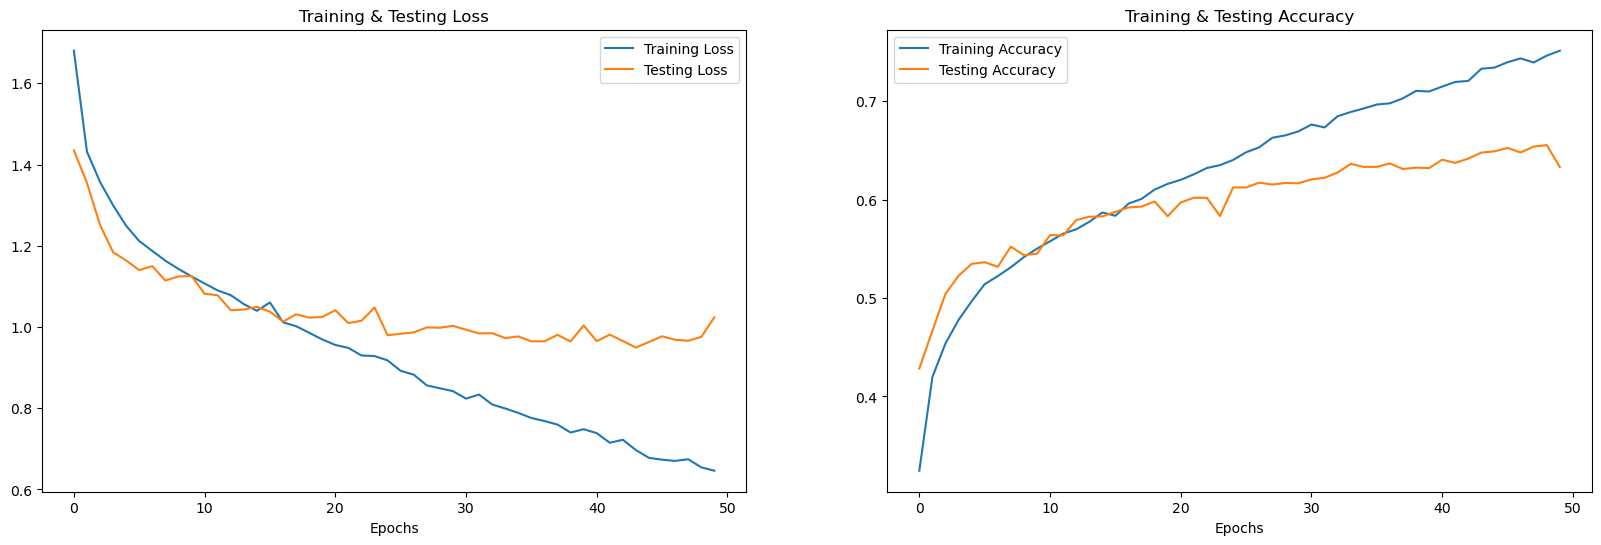

In [60]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [61]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 3s 11ms/step


In [62]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4              sad          fear
5          disgust          fear
6             fear         happy
7            happy         happy
8              sad           sad
9          neutral           sad

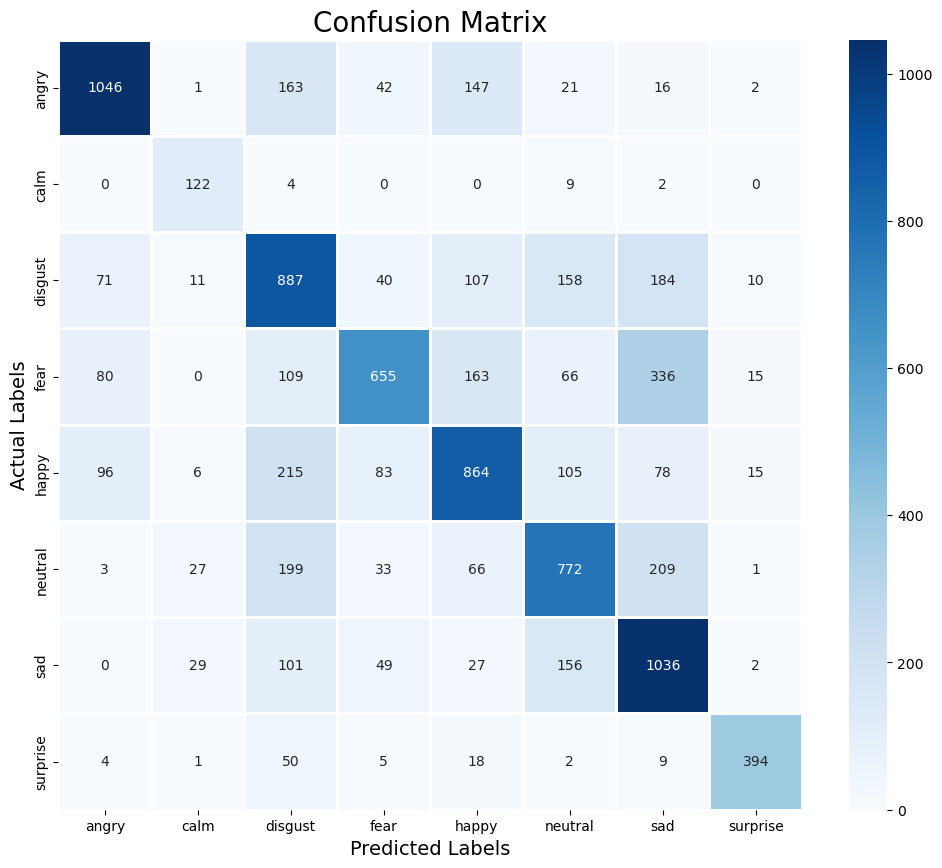

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.80      0.73      0.76      1438
        calm       0.62      0.89      0.73       137
     disgust       0.51      0.60      0.56      1468
        fear       0.72      0.46      0.56      1424
       happy       0.62      0.59      0.61      1462
     neutral       0.60      0.59      0.59      1310
         sad       0.55      0.74      0.63      1400
    surprise       0.90      0.82      0.85       483

    accuracy                           0.63      9122
   macro avg       0.67      0.68      0.66      9122
weighted avg       0.65      0.63      0.63      9122



In [108]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [109]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [110]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [111]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [115]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 activation_35 (Activation)  (None, 162, 256)          0         
                                                                 
 conv1d_39 (Conv1D)          (None, 162, 128)          163968    
                                                                 
 activation_36 (Activation)  (None, 162, 128)          0         
                                                                 
 dropout_11 (Dropout)        (None, 162, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 20, 128)           0         
 ng1D)                                                           
                                                     

In [118]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1711/1711 [==============================] - 32s 19ms/step - loss: 1.0420 - accuracy: 0.5901 - val_loss: 1.0528 - val_accuracy: 0.5888
Epoch 2/50
1711/1711 [==============================] - 34s 20ms/step - loss: 0.9692 - accuracy: 0.6218 - val_loss: 0.9853 - val_accuracy: 0.6171
Epoch 3/50
1711/1711 [==============================] - 34s 20ms/step - loss: 0.8936 - accuracy: 0.6501 - val_loss: 0.9531 - val_accuracy: 0.6230
Epoch 4/50
1711/1711 [==============================] - 34s 20ms/step - loss: 0.8272 - accuracy: 0.6790 - val_loss: 0.9466 - val_accuracy: 0.6379
Epoch 5/50
1711/1711 [==============================] - 33s 19ms/step - loss: 0.7697 - accuracy: 0.7025 - val_loss: 0.9487 - val_accuracy: 0.6412
Epoch 6/50
1711/1711 [==============================] - 34s 20ms/step - loss: 0.7005 - accuracy: 0.7317 - val_loss: 0.9192 - val_accuracy: 0.6564
Epoch 7/50
1711/1711 [==============================] - 34s 20ms/step - loss: 0.6610 - accuracy: 0.7465 - val_loss: 0.9253 -

286/286 [==============================] - 2s 7ms/step - loss: 1.6059 - accuracy: 0.7210
Accuracy of our model on test data :  72.10041880607605 %


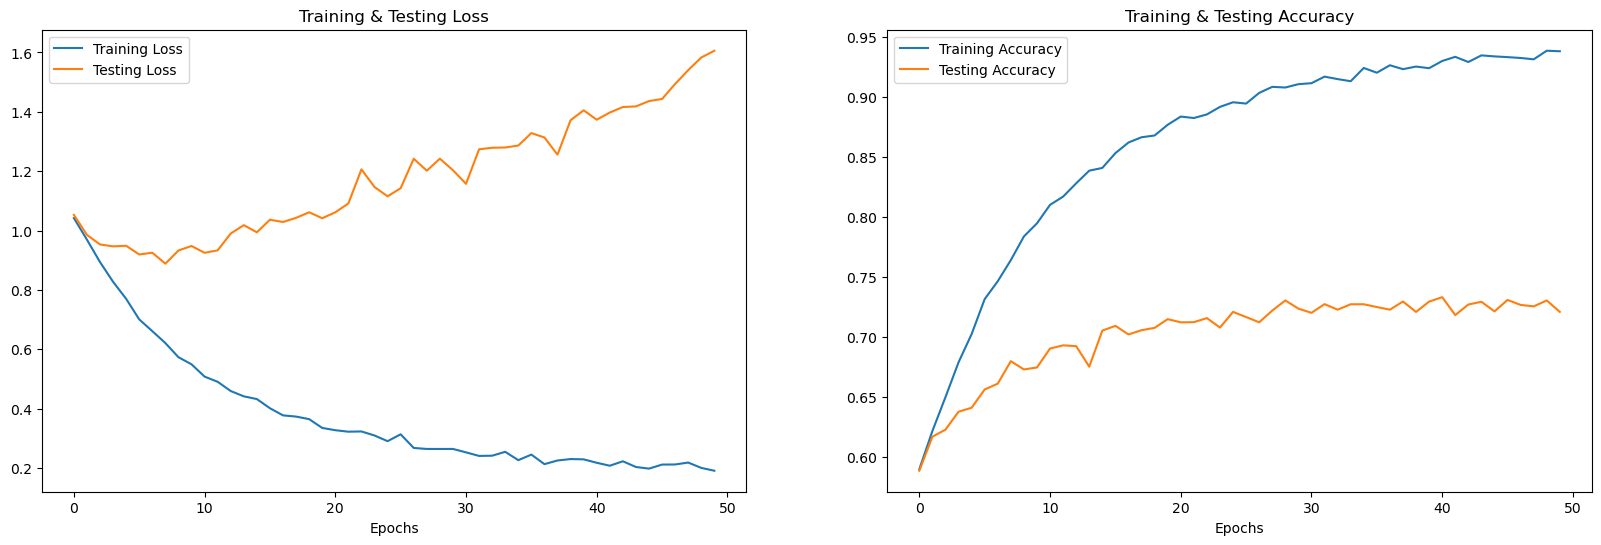

In [119]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [120]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 2s 7ms/step


Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4             fear          fear
5          disgust          fear
6            happy         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

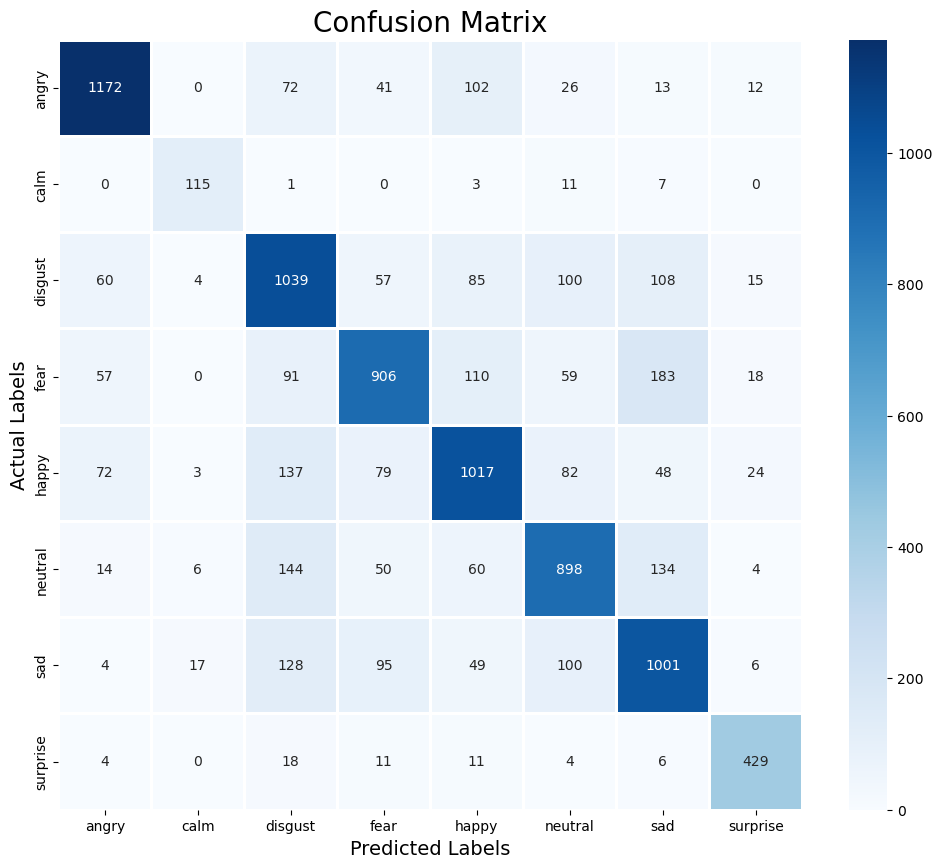

In [121]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.82      0.83      1438
        calm       0.79      0.84      0.82       137
     disgust       0.64      0.71      0.67      1468
        fear       0.73      0.64      0.68      1424
       happy       0.71      0.70      0.70      1462
     neutral       0.70      0.69      0.69      1310
         sad       0.67      0.71      0.69      1400
    surprise       0.84      0.89      0.87       483

    accuracy                           0.72      9122
   macro avg       0.74      0.75      0.74      9122
weighted avg       0.72      0.72      0.72      9122

